In [8]:
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, BayesianRidge

In [9]:
T     = 2
N     = 100
split = int(N/2)
t     = np.arange(0,N)
sigma = 1
eps   = np.random.randn(N)*sigma

a  = 0.2
b  = 0.5
c  = 2
d  = 2
k1 = 25
k2 = 7

ytrue  = a*t + b + c*np.sin(2*np.pi/k1*t) + d*np.sin(2*np.pi/k2*t)
y      = ytrue+eps

t_train = t[:split, np.newaxis]
y_train = y[:split]
t_test  = t[split:, np.newaxis]
y_test  = y[split:]

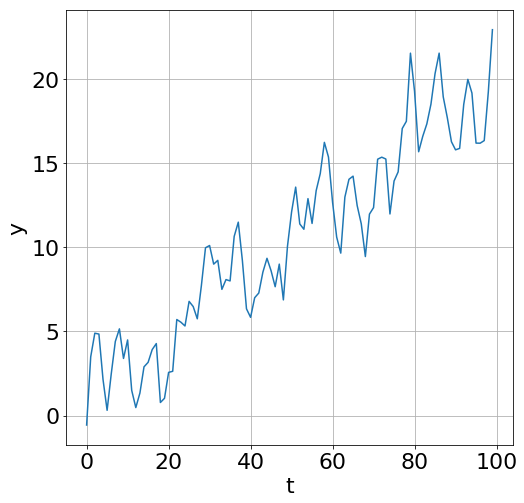

In [10]:
plt.figure(figsize=(8,8))
plt.plot(t,y, label='y')
#plt.plot(t,ytrue, color='r', label='y true')
plt.xlabel('t')
plt.ylabel('y')
plt.grid('on')
plt.savefig('timeseries.png', dpi=300)
plt.show()

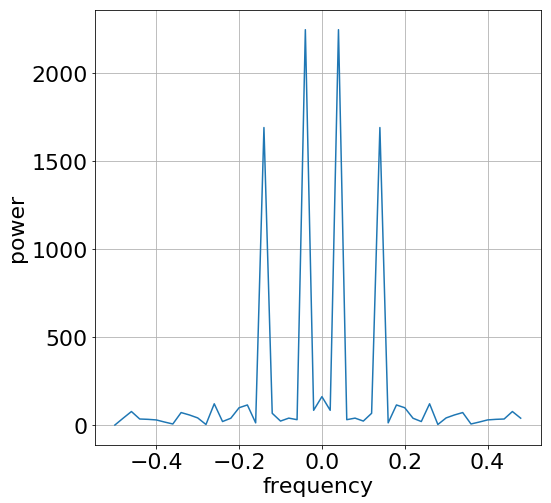

In [11]:
ps = np.abs(np.fft.fft(y_train-b-a*t_train[:,0]))**2
freqs = np.fft.fftfreq(split, 1)
idx = np.argsort(freqs)

plt.figure(figsize=(8,8))
plt.plot(freqs[idx], ps[idx])
plt.xlabel('frequency')
plt.ylabel('power')
plt.grid('on')
plt.savefig('powerspectrum.png',dpi=300)
plt.show()

In [12]:
X = np.zeros((N,5))    
X[:,0] = t
X[:,1] = np.sin(2*np.pi/k1*t)
X[:,2] = np.cos(2*np.pi/k1*t)
X[:,3] = np.sin(2*np.pi/k2*t)
X[:,4] = np.cos(2*np.pi/k2*t)

x_train = X[:split]
x_test  = X[split:]

In [13]:
model = LinearRegression()
print(model)

model.fit(x_train,y_train)
print(model.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[ 0.21257239  1.95085283  0.31233426  1.73890994 -0.11189257]


/home/gabriel/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


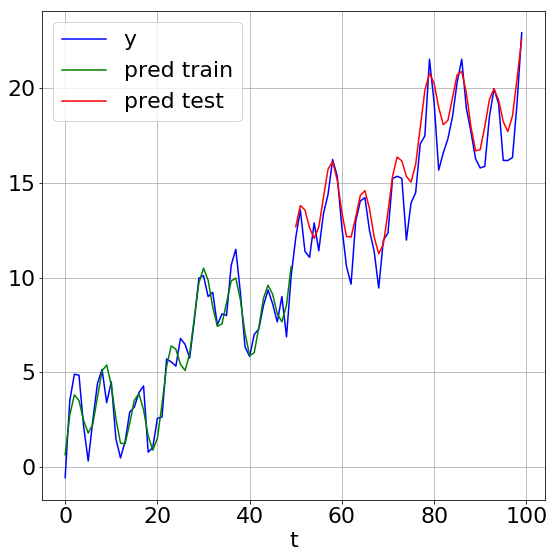

In [14]:
pred_train = model.predict(x_train)
pred_test  = model.predict(x_test)

plt.figure(figsize=(9,9))
plt.plot(t,y,color='b',label='y')
plt.plot(t_train, pred_train, color='g', label='pred train')
plt.plot(t_test, pred_test, color='r', label='pred test')
plt.xlabel('t')
plt.legend()
plt.grid('on')
plt.savefig('forecast.png',dpi=300)
plt.show()

In [15]:
model = BayesianRidge()
print(model)

model.fit(x_train,y_train)
print(model.coef_)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
[ 0.21129174  1.896249    0.30379873  1.69585639 -0.109281  ]


/home/gabriel/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


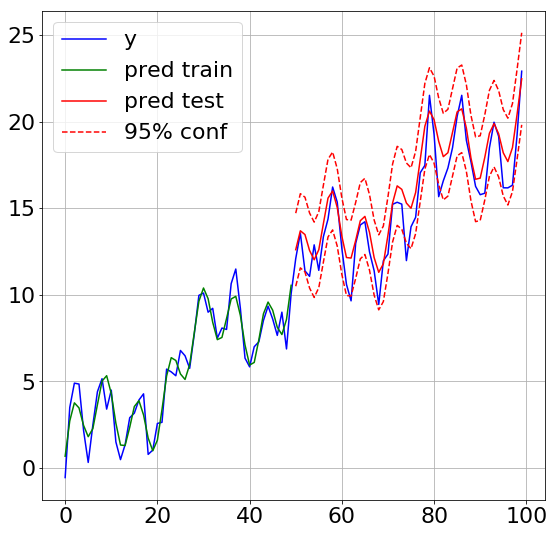

In [16]:
pred_train = model.predict(x_train)
pred_test, std_test  = model.predict(x_test, return_std=True)

plt.figure(figsize=(9,9))
plt.plot(t,y,color='b',label='y')
plt.plot(t_train, pred_train, color='g', label='pred train')
plt.plot(t_test, pred_test, color='r', label='pred test')

plt.plot(t_test, pred_test-2*std_test, color='r', linestyle='--', label='95% conf')
plt.plot(t_test, pred_test+2*std_test, color='r', linestyle='--')

plt.legend()
plt.grid('on')
plt.show()

In [1]:
from statsmodels.tsa.arima_model import SARIMAX